
# Single-layer Perceptron

The idea is that the algorithm is able to find a set of ideal weights, so that the network correctly classifies the inputs. For this, if the network response is not the expected response, a weight adjustment is performed.

Network features:
* Linear classifier, ie, performs classification of linearly separable sets (labeled in this example as -1 and 1).
* Supervised learning.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [2]:
# Inputs and Labels  (label -1 => blue and label 1 => red)
x = [
    [0.72,0.82,-1],
    [0.91,-0.69,-1],
    [0.03,0.93,-1],
    [0.12,0.25,-1],
    [0.96,0.47,-1],
    [0.8,-0.75,-1],
    [0.46,0.98,-1],
    [0.66,0.24,-1],
    [0.72,-0.15,-1],
    [0.35,0.01,-1],
    [-0.11,0.1,1],
    [0.31,-0.96,1],
    [0.0,-0.26,1],
    [-0.43,-0.65,1],
    [0.57,-0.97,1],
    [-0.72,-0.64,1],
    [-0.25,-0.43,1],
    [-0.12,-0.9,1],
    [-0.58,0.62,1],
    [-0.77,-0.76,1]
]

df = pd.DataFrame(x, columns=['x0','x1','y'])
print(df.shape)
df.head()

(20, 3)


,x0,x1,y
0,0.72,0.82,-1
1,0.91,-0.69,-1
2,0.03,0.93,-1
3,0.12,0.25,-1
4,0.96,0.47,-1


In [3]:
df.tail()

,x0,x1,y
15,-0.72,-0.64,1
16,-0.25,-0.43,1
17,-0.12,-0.90,1
18,-0.58,0.62,1
19,-0.77,-0.76,1


In [4]:
mylist = ['r' if i==1 else 'b' for i in df['y']]
print(mylist)

['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r']


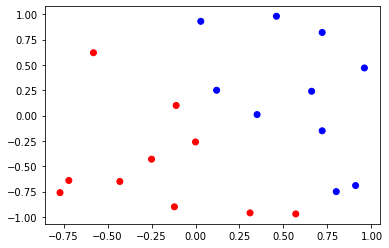

In [5]:
plt.scatter(df['x0'], df['x1'], c = ['r' if i==1 else 'b' for i in df['y']])

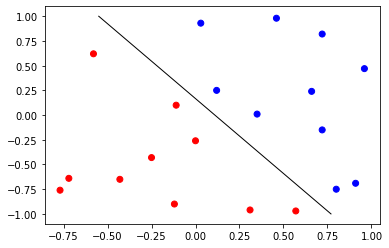

In [6]:
plt.scatter(df['x0'], df['x1'], c = ['r' if i==1 else 'b' for i in df['y']])
# Plot the black line, that is, we want to learn the black line as faithfully as possible
plt.plot([0.77, -0.55], [-1, 1], color='k', linestyle='-', linewidth=1)

### Logistic regression Loss function and Gradients: 
\begin{equation*} Log Loss = - \sum y_i log(p_i) + (1-y_i) log(1 - p_i)\end{equation*}
* *The derivative(slope/gradient) for Loss function of Logistic Regression is:*    **x * (ypredicted - yactual)**
* *The weight will then be upated as:*    **weight = weight - learningRate * gradient**
* *Thus,* **weight = weight - learning rate *  x * (ypredicted - yactual)**

### Steps:
1. Initialize random weights (w) and based on that draw the classification line
2. Iterate from 1 to noOfIterations
3. ----Iterate for all points in data (x)
4. --------**Predict** the current point  (ypredicted = w0x0 + w1x1 + bias)
5. --------If successfully predicted (yp = ya) , go to 7
6. --------If not successfully predicted (yp <> ya),  **update weights**
7. --------Next point, go to
8. ----If all points predicted correctly, break
9. ----Next iteration

In [7]:


# first row (first point)   [0.72,0.82,-1]
x0 = 0.72
x1 = 0.82
yactual = -1
# w0, w1, bias -->random  
w0 = -1.65
w1 = -0.35
bias = 1
predicted_y = w0*x0 + w1*x1 + bias
print(predicted_y)
threshold = 0
if predicted_y > threshold:
  yp = 1
else:
  yp = -1
print(yp)

-0.47499999999999987
-1


### Helper Functions - predict and update

In [8]:
# ypredicted = w0x0 + w1x1 + bias

# point -> (x0, x1)
# w -> (w0, w1)
def predict(point, w, bias, threshold):
    sum = bias

    for j in range(0,len(point)-1):
        sum += point[j] * w[j]

    if sum > threshold:
        y = 1
    else:
        y = -1

    return y

**weight = weight - learning rate *  x * (ypredicted - yactual)**

For the perceptron, we update the weights only when 'ypredicted' is not equal to 'yactual'
* In our example above, 'yactual' can be either -1 or +1
* So, ypredicted - yacutal = -yactual - yactual = -2* yactual
* Therefore, weight = weight - (learning rate) *  x* (-2)* yacutal = weight + 2* (learning rate) * x * yactual
* Or, weight = weight + (learning rate) * x * yactual

Similarly, [bias = bias - (learning rate) *  (predictions - actual)]  becomes
* bias = bias + (learning rate) * actual

In [9]:
def updateWeights(point, w, bias):
    for j in range (0,len(w)):
        w[j] = w[j] + (learning_rate * point[2] * point[j])

    bias = bias + learning_rate *2 * point[2]
    return w, bias

*The Single-layer Perceptron settings - The Weights are initialized as zeros, the Threshold and Bias are respectively set to 0 and 1*

### Steps:
1. Initialize random weights (w) and based on that draw the classification line
2. Iterate from 1 to epochs
3. ----Iterate for all points in data (x)
4. --------**Predict** the current point  (ypredicted = w0x0 + w1x1 + bias)
5. --------If successfully predicted, go to 7
6. --------If not successfully predicted,  **update weights**
7. --------Next point, go to 4
8. ----If all points predicted correctly, break
9. ----Next iteration

In [ ]:
print(x)

### Code v1

In [21]:
# Step 1: Initialize random weights (w) and based on that draw the classification line
w = [0,0]  # Weights  w0, w1
bias = 1
threshold = 0

learning_rate = 1
max_epochs = 100

In [10]:
x[0]

[0.72, 0.82, -1]

In [13]:
x[0][2]

-1

In [22]:
print('Starting weights: ', str(w))
for k in range(1, max_epochs):
    hits = 0
    print("\n------------------------- Iteration "+str(k)+" ------------------------- ")
    for i in range(0,len(x)):
        ypredicted = predict(x[i], w, bias, threshold)
        # Update the Weights if the output does not match with the Desired output
        if ypredicted == x[i][2]:  # e.g. if  x[0] = [0.72,0.82,-1]... then x[0][2] is the yactual
            hits += 1 
        else:
            w, bias = updateWeights(x[i], w, bias)

    if hits == len(x):
        print("\nWeights fully optimized with "+str(k)+" iterations!")
        print("weights:", w)
        print("bias:", bias)
        break;
    else:
        print("\nWeights not fully optimized!")
        print("weights:", w)
        print("bias:", bias)

print("\nDone!\n")

Starting weights:  [0, 0]

------------------------- Iteration 1 ------------------------- 

Weights not fully optimized!
weights: [-0.83, -0.72]
bias: 1

------------------------- Iteration 2 ------------------------- 

Weights not fully optimized!
weights: [-1.2800000000000002, -0.9]
bias: 3

------------------------- Iteration 3 ------------------------- 

Weights not fully optimized!
weights: [-3.02, -0.93]
bias: 1

------------------------- Iteration 4 ------------------------- 

Weights not fully optimized!
weights: [-3.1599999999999997, -1.76]
bias: 1

------------------------- Iteration 5 ------------------------- 

Weights not fully optimized!
weights: [-3.3899999999999997, -1.9099999999999997]
bias: 1

------------------------- Iteration 6 ------------------------- 

Weights not fully optimized!
weights: [-3.6199999999999997, -2.0599999999999996]
bias: 1

------------------------- Iteration 7 ------------------------- 

Weights not fully optimized!
weights: [-3.84999999999999

In [16]:
w, bias

([-3.8499999999999996, -2.2099999999999995], 1)

### Code v2

In [23]:
w = [0,0]  # Weights  w0, w1
bias = 1
threshold = 0

learning_rate = 1
max_epochs = 100

In [24]:
print('Starting weights: ', str(w))
for k in range(1, max_epochs):
    hits = 0
    print("\n------------------------- Iteration "+str(k)+" ------------------------- ")
    for i in range(0,len(x)):
        correctlyPredicted = False
        printStr = "Point "+ str(i) + ":" +str(x[i]) + " Weights:"+str(w)+ ' Bias:' + str(bias)
        ypredicted = predict(x[i], w, bias, threshold)
        
        # Update the Weights if the output does not match with the Desired output
        if ypredicted == x[i][2]:  # e.g. if  x[0] = [0.72,0.82,-1]... then x[0][2] is the yactual
            hits += 1
            correctlyPredicted = True   
            print(printStr + " Correctly classified")
        else:
            print(printStr + " Incorrectly classified")
            w, bias = updateWeights(x[i], w, bias)
            print('Updated weights: ', str(w), "  Updated bias:", bias)

    if hits == len(x):
        print("\n---------------------------------------------------------------")
        print("\nFunctionality learned with "+str(k)+" iterations!")
        break;
    else:
        print("\n---------------------------------------------------------------")
        print("\nFunctionality not learned!")

print("\nDone!\n")

Starting weights:  [0, 0]

------------------------- Iteration 1 ------------------------- 
Point 0:[0.72, 0.82, -1] Weights:[0, 0] Bias:1 Incorrectly classified
Updated weights:  [-0.72, -0.82]   Updated bias: -1
Point 1:[0.91, -0.69, -1] Weights:[-0.72, -0.82] Bias:-1 Correctly classified
Point 2:[0.03, 0.93, -1] Weights:[-0.72, -0.82] Bias:-1 Correctly classified
Point 3:[0.12, 0.25, -1] Weights:[-0.72, -0.82] Bias:-1 Correctly classified
Point 4:[0.96, 0.47, -1] Weights:[-0.72, -0.82] Bias:-1 Correctly classified
Point 5:[0.8, -0.75, -1] Weights:[-0.72, -0.82] Bias:-1 Correctly classified
Point 6:[0.46, 0.98, -1] Weights:[-0.72, -0.82] Bias:-1 Correctly classified
Point 7:[0.66, 0.24, -1] Weights:[-0.72, -0.82] Bias:-1 Correctly classified
Point 8:[0.72, -0.15, -1] Weights:[-0.72, -0.82] Bias:-1 Correctly classified
Point 9:[0.35, 0.01, -1] Weights:[-0.72, -0.82] Bias:-1 Correctly classified
Point 10:[-0.11, 0.1, 1] Weights:[-0.72, -0.82] Bias:-1 Incorrectly classified
Updated weig

In [ ]:
w, bias

### Code v3

#### Adding the scatter plot at each step to see the progress:
1. Initialize random weights and based on that draw the classification line
2. Iterate from 1 to max_iterations
3. ----Iterate for all points in data
4. --------**Predict** the current point
5. --------If successfully predicted, **plot graph**, go to 7
6. --------If not successfully predicted,  **update weights**, **plot graph**
7. --------Next point, go to 4
8. ----If all points predicted correctly, break
9. ----Next iteration

In [25]:
def createPlot(point, w, bias, correctlyPredicted):
    plt.clf() # Clear figure
    plt.title('Iteration %s\n' % (str(k)))
    plt.grid(False) # Plot a grid
    plt.xlim(-1,1) # Set x-axis limits
    plt.ylim(-1,1) # Set y-axis limits
    
    plotLearningLine = True
    # ax + by + c = 0   => w[0]*x + w[1]*y + bias = 0 ---- from the slides.... a is w[0], b is w[1], c is bias
    if w[1] != 0:
        xA = 1 
        xB = -1
        yA = (- w[0] * xA - bias) / w[1]
        yB = (- w[0] * xB - bias) / w[1]
    elif (w[0] !=0):
        yA = 1
        yB = -1
        xA = (- w[1] * yA - bias) / w[0]
        xB = (- w[1] * yB - bias) / w[0]
    else:
        print("Not plotting the Learning line")
        plotLearningLine = False

    # Plot the black line, that is, we want to learn the black line as faithfully as possible
    plt.plot([0.77, -0.55], [-1, 1], color='k', linestyle='-', linewidth=1)

    
    if plotLearningLine:
        plt.plot([xA, xB], [yA, yB], color='g', linestyle='-', linewidth=2)  # Learning line (Decision Boundary)

    #plt.plot(x0blue, x1blue, 'bo')  # Plot blue points
    #plt.plot(x0red, x1red, 'ro')    # Plot red points
    plt.scatter(df['x0'], df['x1'], c=['r' if i==1 else 'b' for i in df['y']])
    if correctlyPredicted:
        plt.plot(point[0], point[1], 'go', markersize=15, alpha=.5)  # Highlight current point with with green color
    else:  
        plt.plot(point[0], point[1], 'mo', markersize=30, alpha=.5)  # Highlight current point with magenta color
        
    plt.show()
    plt.pause(0.05) # We were able to control the loop time, so a figure will be updated and displayed


In [28]:
w = [0,0]  # Weights
bias = 1
threshold = 0

learning_rate = 1
max_epoch = 100
needPlot = True


------------------------- EPOCH 1 ------------------------- 
Point 0:[0.72, 0.82, -1] Weights:[0, 0] Incorrectly classified
Updated weights:  [-0.72, -0.82]


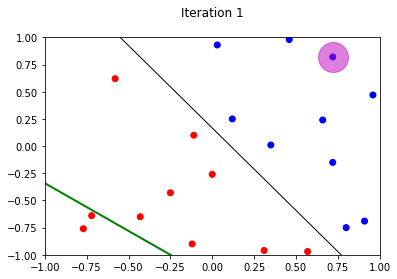

Point 1:[0.91, -0.69, -1] Weights:[-0.72, -0.82] Correctly classified
Point 2:[0.03, 0.93, -1] Weights:[-0.72, -0.82] Correctly classified
Point 3:[0.12, 0.25, -1] Weights:[-0.72, -0.82] Correctly classified
Point 4:[0.96, 0.47, -1] Weights:[-0.72, -0.82] Correctly classified
Point 5:[0.8, -0.75, -1] Weights:[-0.72, -0.82] Correctly classified
Point 6:[0.46, 0.98, -1] Weights:[-0.72, -0.82] Correctly classified
Point 7:[0.66, 0.24, -1] Weights:[-0.72, -0.82] Correctly classified
Point 8:[0.72, -0.15, -1] Weights:[-0.72, -0.82] Correctly classified
Point 9:[0.35, 0.01, -1] Weights:[-0.72, -0.82] Correctly classified
Point 10:[-0.11, 0.1, 1] Weights:[-0.72, -0.82] Incorrectly classified
Updated weights:  [-0.83, -0.72]


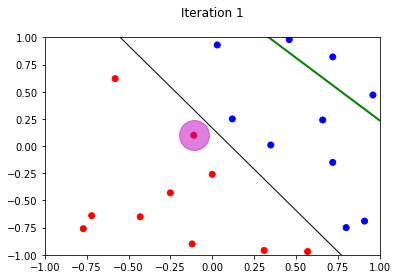

Point 11:[0.31, -0.96, 1] Weights:[-0.83, -0.72] Correctly classified
Point 12:[0.0, -0.26, 1] Weights:[-0.83, -0.72] Correctly classified
Point 13:[-0.43, -0.65, 1] Weights:[-0.83, -0.72] Correctly classified
Point 14:[0.57, -0.97, 1] Weights:[-0.83, -0.72] Correctly classified
Point 15:[-0.72, -0.64, 1] Weights:[-0.83, -0.72] Correctly classified
Point 16:[-0.25, -0.43, 1] Weights:[-0.83, -0.72] Correctly classified
Point 17:[-0.12, -0.9, 1] Weights:[-0.83, -0.72] Correctly classified
Point 18:[-0.58, 0.62, 1] Weights:[-0.83, -0.72] Correctly classified
Point 19:[-0.77, -0.76, 1] Weights:[-0.83, -0.72] Correctly classified

---------------------------------------------------------------

Functionality not learned!

------------------------- EPOCH 2 ------------------------- 
Point 0:[0.72, 0.82, -1] Weights:[-0.83, -0.72] Correctly classified
Point 1:[0.91, -0.69, -1] Weights:[-0.83, -0.72] Incorrectly classified
Updated weights:  [-1.74, -0.030000000000000027]


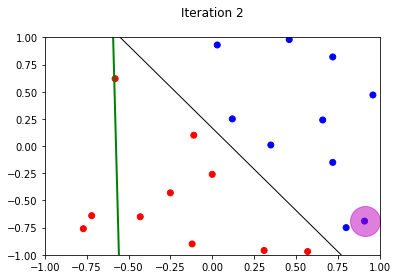

Point 2:[0.03, 0.93, -1] Weights:[-1.74, -0.030000000000000027] Correctly classified
Point 3:[0.12, 0.25, -1] Weights:[-1.74, -0.030000000000000027] Correctly classified
Point 4:[0.96, 0.47, -1] Weights:[-1.74, -0.030000000000000027] Correctly classified
Point 5:[0.8, -0.75, -1] Weights:[-1.74, -0.030000000000000027] Correctly classified
Point 6:[0.46, 0.98, -1] Weights:[-1.74, -0.030000000000000027] Correctly classified
Point 7:[0.66, 0.24, -1] Weights:[-1.74, -0.030000000000000027] Correctly classified
Point 8:[0.72, -0.15, -1] Weights:[-1.74, -0.030000000000000027] Correctly classified
Point 9:[0.35, 0.01, -1] Weights:[-1.74, -0.030000000000000027] Correctly classified
Point 10:[-0.11, 0.1, 1] Weights:[-1.74, -0.030000000000000027] Incorrectly classified
Updated weights:  [-1.85, 0.06999999999999998]


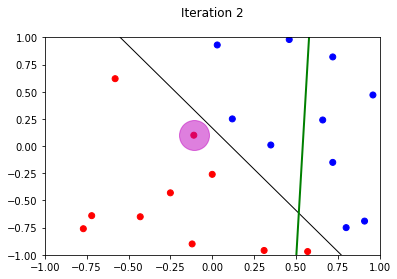

Point 11:[0.31, -0.96, 1] Weights:[-1.85, 0.06999999999999998] Correctly classified
Point 12:[0.0, -0.26, 1] Weights:[-1.85, 0.06999999999999998] Correctly classified
Point 13:[-0.43, -0.65, 1] Weights:[-1.85, 0.06999999999999998] Correctly classified
Point 14:[0.57, -0.97, 1] Weights:[-1.85, 0.06999999999999998] Incorrectly classified
Updated weights:  [-1.2800000000000002, -0.9]


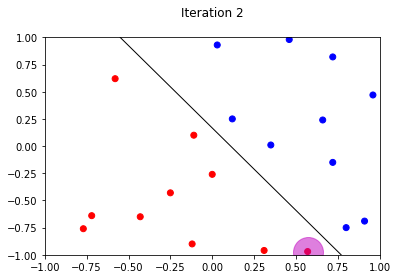

Point 15:[-0.72, -0.64, 1] Weights:[-1.2800000000000002, -0.9] Correctly classified
Point 16:[-0.25, -0.43, 1] Weights:[-1.2800000000000002, -0.9] Correctly classified
Point 17:[-0.12, -0.9, 1] Weights:[-1.2800000000000002, -0.9] Correctly classified
Point 18:[-0.58, 0.62, 1] Weights:[-1.2800000000000002, -0.9] Correctly classified
Point 19:[-0.77, -0.76, 1] Weights:[-1.2800000000000002, -0.9] Correctly classified

---------------------------------------------------------------

Functionality not learned!

------------------------- EPOCH 3 ------------------------- 
Point 0:[0.72, 0.82, -1] Weights:[-1.2800000000000002, -0.9] Incorrectly classified
Updated weights:  [-2.0, -1.72]


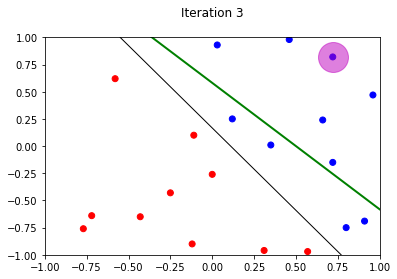

Point 1:[0.91, -0.69, -1] Weights:[-2.0, -1.72] Incorrectly classified
Updated weights:  [-2.91, -1.03]


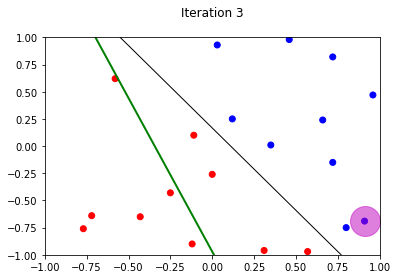

Point 2:[0.03, 0.93, -1] Weights:[-2.91, -1.03] Correctly classified
Point 3:[0.12, 0.25, -1] Weights:[-2.91, -1.03] Correctly classified
Point 4:[0.96, 0.47, -1] Weights:[-2.91, -1.03] Correctly classified
Point 5:[0.8, -0.75, -1] Weights:[-2.91, -1.03] Correctly classified
Point 6:[0.46, 0.98, -1] Weights:[-2.91, -1.03] Correctly classified
Point 7:[0.66, 0.24, -1] Weights:[-2.91, -1.03] Correctly classified
Point 8:[0.72, -0.15, -1] Weights:[-2.91, -1.03] Correctly classified
Point 9:[0.35, 0.01, -1] Weights:[-2.91, -1.03] Correctly classified
Point 10:[-0.11, 0.1, 1] Weights:[-2.91, -1.03] Incorrectly classified
Updated weights:  [-3.02, -0.93]


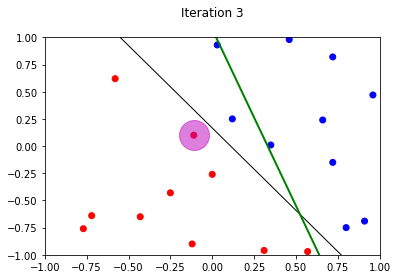

Point 11:[0.31, -0.96, 1] Weights:[-3.02, -0.93] Correctly classified
Point 12:[0.0, -0.26, 1] Weights:[-3.02, -0.93] Correctly classified
Point 13:[-0.43, -0.65, 1] Weights:[-3.02, -0.93] Correctly classified
Point 14:[0.57, -0.97, 1] Weights:[-3.02, -0.93] Correctly classified
Point 15:[-0.72, -0.64, 1] Weights:[-3.02, -0.93] Correctly classified
Point 16:[-0.25, -0.43, 1] Weights:[-3.02, -0.93] Correctly classified
Point 17:[-0.12, -0.9, 1] Weights:[-3.02, -0.93] Correctly classified
Point 18:[-0.58, 0.62, 1] Weights:[-3.02, -0.93] Correctly classified
Point 19:[-0.77, -0.76, 1] Weights:[-3.02, -0.93] Correctly classified

---------------------------------------------------------------

Functionality not learned!

------------------------- EPOCH 4 ------------------------- 
Point 0:[0.72, 0.82, -1] Weights:[-3.02, -0.93] Correctly classified
Point 1:[0.91, -0.69, -1] Weights:[-3.02, -0.93] Correctly classified
Point 2:[0.03, 0.93, -1] Weights:[-3.02, -0.93] Incorrectly classified
Up

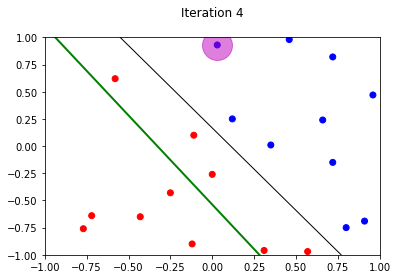

Point 3:[0.12, 0.25, -1] Weights:[-3.05, -1.86] Correctly classified
Point 4:[0.96, 0.47, -1] Weights:[-3.05, -1.86] Correctly classified
Point 5:[0.8, -0.75, -1] Weights:[-3.05, -1.86] Correctly classified
Point 6:[0.46, 0.98, -1] Weights:[-3.05, -1.86] Correctly classified
Point 7:[0.66, 0.24, -1] Weights:[-3.05, -1.86] Correctly classified
Point 8:[0.72, -0.15, -1] Weights:[-3.05, -1.86] Correctly classified
Point 9:[0.35, 0.01, -1] Weights:[-3.05, -1.86] Correctly classified
Point 10:[-0.11, 0.1, 1] Weights:[-3.05, -1.86] Incorrectly classified
Updated weights:  [-3.1599999999999997, -1.76]


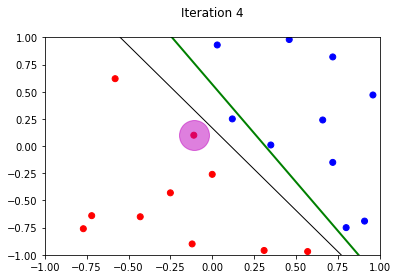

Point 11:[0.31, -0.96, 1] Weights:[-3.1599999999999997, -1.76] Correctly classified
Point 12:[0.0, -0.26, 1] Weights:[-3.1599999999999997, -1.76] Correctly classified
Point 13:[-0.43, -0.65, 1] Weights:[-3.1599999999999997, -1.76] Correctly classified
Point 14:[0.57, -0.97, 1] Weights:[-3.1599999999999997, -1.76] Correctly classified
Point 15:[-0.72, -0.64, 1] Weights:[-3.1599999999999997, -1.76] Correctly classified
Point 16:[-0.25, -0.43, 1] Weights:[-3.1599999999999997, -1.76] Correctly classified
Point 17:[-0.12, -0.9, 1] Weights:[-3.1599999999999997, -1.76] Correctly classified
Point 18:[-0.58, 0.62, 1] Weights:[-3.1599999999999997, -1.76] Correctly classified
Point 19:[-0.77, -0.76, 1] Weights:[-3.1599999999999997, -1.76] Correctly classified

---------------------------------------------------------------

Functionality not learned!

------------------------- EPOCH 5 ------------------------- 
Point 0:[0.72, 0.82, -1] Weights:[-3.1599999999999997, -1.76] Correctly classified
Poi

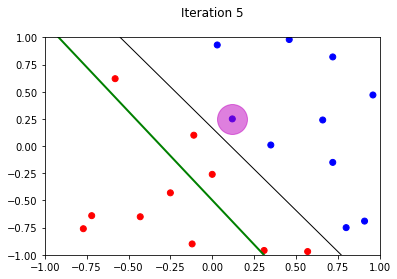

Point 4:[0.96, 0.47, -1] Weights:[-3.28, -2.01] Correctly classified
Point 5:[0.8, -0.75, -1] Weights:[-3.28, -2.01] Correctly classified
Point 6:[0.46, 0.98, -1] Weights:[-3.28, -2.01] Correctly classified
Point 7:[0.66, 0.24, -1] Weights:[-3.28, -2.01] Correctly classified
Point 8:[0.72, -0.15, -1] Weights:[-3.28, -2.01] Correctly classified
Point 9:[0.35, 0.01, -1] Weights:[-3.28, -2.01] Correctly classified
Point 10:[-0.11, 0.1, 1] Weights:[-3.28, -2.01] Incorrectly classified
Updated weights:  [-3.3899999999999997, -1.9099999999999997]


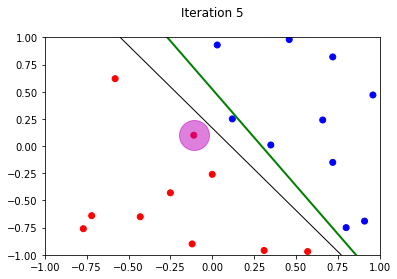

Point 11:[0.31, -0.96, 1] Weights:[-3.3899999999999997, -1.9099999999999997] Correctly classified
Point 12:[0.0, -0.26, 1] Weights:[-3.3899999999999997, -1.9099999999999997] Correctly classified
Point 13:[-0.43, -0.65, 1] Weights:[-3.3899999999999997, -1.9099999999999997] Correctly classified
Point 14:[0.57, -0.97, 1] Weights:[-3.3899999999999997, -1.9099999999999997] Correctly classified
Point 15:[-0.72, -0.64, 1] Weights:[-3.3899999999999997, -1.9099999999999997] Correctly classified
Point 16:[-0.25, -0.43, 1] Weights:[-3.3899999999999997, -1.9099999999999997] Correctly classified
Point 17:[-0.12, -0.9, 1] Weights:[-3.3899999999999997, -1.9099999999999997] Correctly classified
Point 18:[-0.58, 0.62, 1] Weights:[-3.3899999999999997, -1.9099999999999997] Correctly classified
Point 19:[-0.77, -0.76, 1] Weights:[-3.3899999999999997, -1.9099999999999997] Correctly classified

---------------------------------------------------------------

Functionality not learned!

---------------------

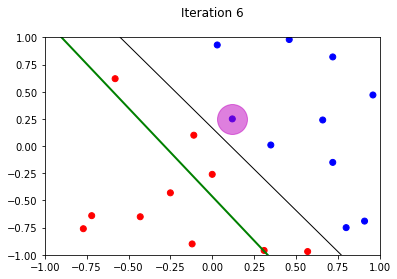

Point 4:[0.96, 0.47, -1] Weights:[-3.51, -2.1599999999999997] Correctly classified
Point 5:[0.8, -0.75, -1] Weights:[-3.51, -2.1599999999999997] Correctly classified
Point 6:[0.46, 0.98, -1] Weights:[-3.51, -2.1599999999999997] Correctly classified
Point 7:[0.66, 0.24, -1] Weights:[-3.51, -2.1599999999999997] Correctly classified
Point 8:[0.72, -0.15, -1] Weights:[-3.51, -2.1599999999999997] Correctly classified
Point 9:[0.35, 0.01, -1] Weights:[-3.51, -2.1599999999999997] Correctly classified
Point 10:[-0.11, 0.1, 1] Weights:[-3.51, -2.1599999999999997] Incorrectly classified
Updated weights:  [-3.6199999999999997, -2.0599999999999996]


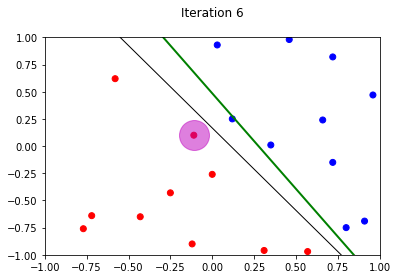

Point 11:[0.31, -0.96, 1] Weights:[-3.6199999999999997, -2.0599999999999996] Correctly classified
Point 12:[0.0, -0.26, 1] Weights:[-3.6199999999999997, -2.0599999999999996] Correctly classified
Point 13:[-0.43, -0.65, 1] Weights:[-3.6199999999999997, -2.0599999999999996] Correctly classified
Point 14:[0.57, -0.97, 1] Weights:[-3.6199999999999997, -2.0599999999999996] Correctly classified
Point 15:[-0.72, -0.64, 1] Weights:[-3.6199999999999997, -2.0599999999999996] Correctly classified
Point 16:[-0.25, -0.43, 1] Weights:[-3.6199999999999997, -2.0599999999999996] Correctly classified
Point 17:[-0.12, -0.9, 1] Weights:[-3.6199999999999997, -2.0599999999999996] Correctly classified
Point 18:[-0.58, 0.62, 1] Weights:[-3.6199999999999997, -2.0599999999999996] Correctly classified
Point 19:[-0.77, -0.76, 1] Weights:[-3.6199999999999997, -2.0599999999999996] Correctly classified

---------------------------------------------------------------

Functionality not learned!

---------------------

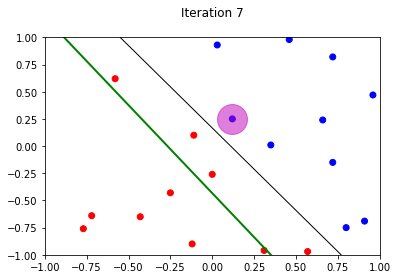

Point 4:[0.96, 0.47, -1] Weights:[-3.7399999999999998, -2.3099999999999996] Correctly classified
Point 5:[0.8, -0.75, -1] Weights:[-3.7399999999999998, -2.3099999999999996] Correctly classified
Point 6:[0.46, 0.98, -1] Weights:[-3.7399999999999998, -2.3099999999999996] Correctly classified
Point 7:[0.66, 0.24, -1] Weights:[-3.7399999999999998, -2.3099999999999996] Correctly classified
Point 8:[0.72, -0.15, -1] Weights:[-3.7399999999999998, -2.3099999999999996] Correctly classified
Point 9:[0.35, 0.01, -1] Weights:[-3.7399999999999998, -2.3099999999999996] Correctly classified
Point 10:[-0.11, 0.1, 1] Weights:[-3.7399999999999998, -2.3099999999999996] Incorrectly classified
Updated weights:  [-3.8499999999999996, -2.2099999999999995]


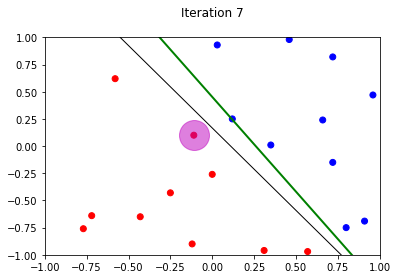

Point 11:[0.31, -0.96, 1] Weights:[-3.8499999999999996, -2.2099999999999995] Correctly classified
Point 12:[0.0, -0.26, 1] Weights:[-3.8499999999999996, -2.2099999999999995] Correctly classified
Point 13:[-0.43, -0.65, 1] Weights:[-3.8499999999999996, -2.2099999999999995] Correctly classified
Point 14:[0.57, -0.97, 1] Weights:[-3.8499999999999996, -2.2099999999999995] Correctly classified
Point 15:[-0.72, -0.64, 1] Weights:[-3.8499999999999996, -2.2099999999999995] Correctly classified
Point 16:[-0.25, -0.43, 1] Weights:[-3.8499999999999996, -2.2099999999999995] Correctly classified
Point 17:[-0.12, -0.9, 1] Weights:[-3.8499999999999996, -2.2099999999999995] Correctly classified
Point 18:[-0.58, 0.62, 1] Weights:[-3.8499999999999996, -2.2099999999999995] Correctly classified
Point 19:[-0.77, -0.76, 1] Weights:[-3.8499999999999996, -2.2099999999999995] Correctly classified

---------------------------------------------------------------

Functionality not learned!

---------------------

In [29]:
for k in range(1, max_epochs):
    hits = 0
    print("\n------------------------- EPOCH "+str(k)+" ------------------------- ")
    for i in range(0,len(x)):
        correctlyPredicted = False
        printStr = "Point "+ str(i) + ":" +str(x[i]) + " Weights:"+str(w)
        y = predict(x[i], w, bias, threshold)
        #  x[0] = [0.72,0.82,-1]
        # Update the Weights if the output does not match with the Desired output
        if y == x[i][2]:  # x[0][2]
            hits += 1
            correctlyPredicted = True   
            print(printStr + " Correctly classified")
            # if needPlot:
            #     createPlot(x[i], w, bias, correctlyPredicted)
        else:
            print(printStr + " Incorrectly classified")
            w, bias = updateWeights(x[i], w, bias)
            print('Updated weights: ', str(w))
            if needPlot:
                createPlot(x[i], w, bias, correctlyPredicted)

    if hits == len(x):
        print("\n---------------------------------------------------------------")
        print("\nFunctionality learned with "+str(k)+" iterations!")
        break;
    else:
        print("\n---------------------------------------------------------------")
        print("\nFunctionality not learned!")

print("\nDone!\n")

#**Helper-function for plotting red and blue points**

Stores the x and y coordinates for each point of the graph in their respective vectors.

In [ ]:
def get_points_of_color(data, label):
    x_coords = [float(point.split(",")[0]) for point in data.keys() if data[point] == label]
    y_coords = [float(point.split(",")[1]) for point in data.keys() if data[point] == label]
    return x_coords, y_coords

In [ ]:
xr,yr = get_points_of_color(data_dictionary, '1')
xb,yb = get_points_of_color(data_dictionary, '-1')
xr,yr,xb,yb

In [ ]:
#the function to turn on interactive mode 
plt.ion() 
  
#creating randomly generate collections/data 
random_array = np.arange(-4, 5) 
collection_1 = random_array ** 2
collection_2 = 10 / (random_array ** 2 + 1) 
figure, axes = plt.subplots() 
axes.plot(random_array, collection_1, 
          'rx', random_array, 
          collection_2, 'b+',  
          linestyle='solid') 
axes.fill_between(random_array,  
                  collection_1,  
                  collection_2, 
                  where=collection_2>collection_1,  
                  interpolate=True, 
                  color='green', alpha=0.3) 
  
lgnd = axes.legend(['collection-1', 
                    'collection-2'],  
                   loc='upper center',  
                   shadow=True) 
  
lgnd.get_frame().set_facecolor('#ffb19a') 

In [ ]:

plt.ion() 
plt.plot([1.4, 2.5]) 
plt.title(" Sampple interactive plot") 
  
axes = plt.gca() 
axes.plot([3.1, 2.2]) 


In [ ]:

plt.ion() 
plt.plot([1.4, 2.5]) 
plt.title(" Sampple interactive plot") 
plt.plot([3.1, 2.2])